In [1]:
function H2D(pos, x_0::T=1, omega_1::T=1, omega_2::T=1, c::T=1)::Array{Float64,2} where T <: Union{Int, Float64}
    x = pos[1]
    y = pos[2]
    V = zeros(2,2)
    V[1,1] = omega_1^2*(x+x_0)^2+omega_2^2*y^2
    V[2,2] = omega_1^2*(x-x_0)^2+omega_2^2*y^2
    V[1,2] = c*y
    V[2,1] = c*y
    return V
end

H2D (generic function with 5 methods)

In [2]:
E_lower(1.0, 1.0, 1.0)

UndefVarError: UndefVarError: E_lower not defined

In [3]:
function E_0(x, y, x_0=1.0, omega_1=1.0, omega_2=1.0, c=1.0)
    V = zeros(2,2)
    V[1,1] = omega_1^2*(x+x_0)^2+omega_2^2*y^2
    V[2,2] = omega_1^2*(x-x_0)^2+omega_2^2*y^2
    V[1,2] = c*y
    V[2,1] = c*y
    res = (V[1,1]+V[2,2]+sqrt((V[1,1]-V[2,2])^2+4*V[1,2]^2))/2
    return res
end

function E_1(x, y, x_0=1.0, omega_1=1.0, omega_2=1.0, c=1.0)
    V = zeros(2,2)
    V[1,1] = omega_1^2*(x+x_0)^2+omega_2^2*y^2
    V[2,2] = omega_1^2*(x-x_0)^2+omega_2^2*y^2
    V[1,2] = c*y
    V[2,1] = c*y
    res = (V[1,1]+V[2,2]-sqrt((V[1,1]-V[2,2])^2+4*V[1,2]^2))/2
    return res
end

E_1 (generic function with 5 methods)

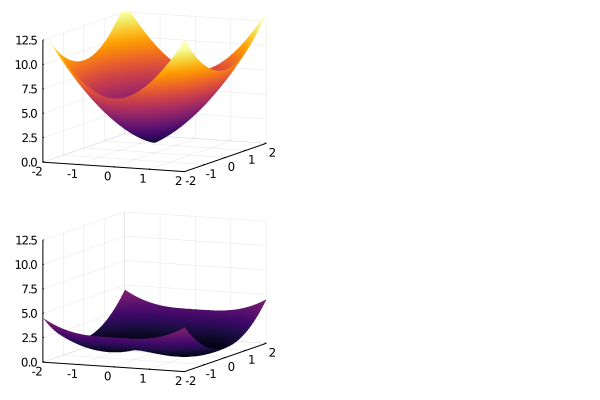

In [59]:
using Plots

gr()

x=-2:0.01:2
y=-2:0.01:2

l = @layout [
    a{0.9w} [grid(2,2)
             b{0.1h}  ]
]

l = @layout [
    [a{0.9w}; 
     b{0.9w}] c{1.0h}
]

lims = extrema([0;15])

p3 = surface(x,y,E_0,zlims=[0,12.5], clims = lims)
p1 = surface(x,y,E_0,zlims=[0,12.5], colorbar= false)
p4 = surface(x,y,E_1,zlims=[0,12.5], colorbar = false)
p2 = surface(x,y,E_1,zlims=[0,12.5], clims = lims)
legend = surface(0,0,0,clims = lims,showaxis = false, grid = false, colorbar = true)
plot(p1,p4,legend,layout=l)

In [90]:
using Dierckx

E = zeros(length(x),length(y))

E_l = [[E_0(x,y) for x in x] for y in y]
E_l = vcat(E_l'...)

E_u = [[E_1(x,y) for x in x] for y in y]
E_u = vcat(E_u'...)

E0 = Spline2D(x, y, E_l)
E1 = Spline2D(x, y, E_u)

Spline2D([-2.0, -2.0, -2.0, -2.0, -1.98, -1.97, -1.96, -1.95, -1.94, -1.93  …  1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 2.0, 2.0, 2.0, 2.0], [-2.0, -2.0, -2.0, -2.0, -1.98, -1.97, -1.96, -1.95, -1.94, -1.93  …  1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 2.0, 2.0, 2.0, 2.0], [4.52786, 4.50418, 4.46883, 4.42207, 4.38718, 4.35247, 4.31794, 4.2836, 4.24943, 4.21545  …  4.21545, 4.24943, 4.2836, 4.31794, 4.35247, 4.38718, 4.42207, 4.46883, 4.50418, 4.52786], 3, 3, 0.0)

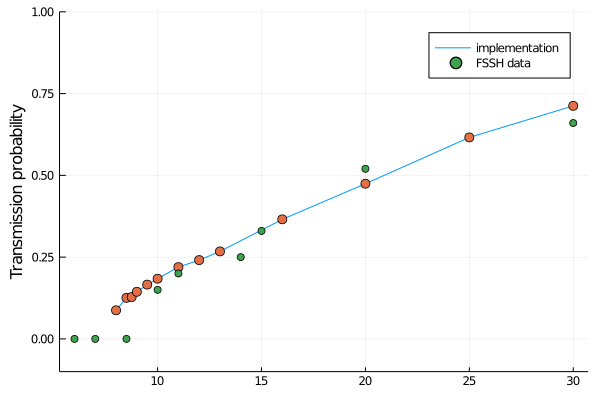